# Entrenamiento 2: Pauta Publicitaria

<b>Contexto</b>

La idea de este notebook es plantearles un problema con datos tomados del Gobierno de la Ciudad de Buenos Aires [BA Data](https://data.buenosaires.gob.ar/dataset/pauta-publicitaria).

<b>Contenido</b>

Este dataset contiene la información respecto a gasto en pauta publicitaria realizada por el Gobierno de la Ciudad de Buenos Aires en el año 2020. Es facil de tratar ya que el mismo solo contiene tres columnas:

* Fecha
* Medio
* Importe

<b>El objetivo</b> este entrenamiento tiene solo una restricción que es usar algún algoritmo de aprendizaje no supervisado para sacar alguna información interesante del mismo. ¿Es esto posible? 



In [40]:
import pandas as pd

In [41]:
df = pd.read_csv('BA_DATA_2020 _PAUTA_PUBLICITARIA_EN_RADIO.csv')

In [42]:
df

,Fecha,Medio,Importe
0,20/01/2020,FM 95.1 METRO,"$ 512.435,00"
1,20/01/2020,AM 790 RADIO MITRE,"$ 480.000,00"
2,20/01/2020,FM 99.9 LA 100,"$ 406.560,00"
3,20/01/2020,AM 990 LA 990,"$ 310.495,68"
4,20/01/2020,AM 790 RADIO MITRE,"$ 258.456,00"
...,...,...,...
2558,23/12/2020,FM 92.1 VORTERIX,"$ 202.211,33"
2559,23/12/2020,FM 102.3 ASPEN,"$ 169.884,00"
2560,23/12/2020,AM 910 LA RED,"$ 162.624,00"
2561,23/12/2020,AM 950 CNN,"$ 151.250,00"


In [43]:
len_medios = len(df['Medio'].unique())

In [44]:
mapping = {item: i for i, item in enumerate(df["Medio"].unique())}

In [45]:
df["Num_Medio"] = df["Medio"].apply(lambda x: mapping[x])

In [46]:
df.dtypes

Fecha        object
Medio        object
Importe      object
Num_Medio     int64
dtype: object

In [47]:
df

,Fecha,Medio,Importe,Num_Medio
0,20/01/2020,FM 95.1 METRO,"$ 512.435,00",0
1,20/01/2020,AM 790 RADIO MITRE,"$ 480.000,00",1
2,20/01/2020,FM 99.9 LA 100,"$ 406.560,00",2
3,20/01/2020,AM 990 LA 990,"$ 310.495,68",3
4,20/01/2020,AM 790 RADIO MITRE,"$ 258.456,00",1
...,...,...,...,...
2558,23/12/2020,FM 92.1 VORTERIX,"$ 202.211,33",28
2559,23/12/2020,FM 102.3 ASPEN,"$ 169.884,00",24
2560,23/12/2020,AM 910 LA RED,"$ 162.624,00",18
2561,23/12/2020,AM 950 CNN,"$ 151.250,00",17


In [49]:
df['Importe'] = df['Importe'].replace('[\$]', '', regex=True)

In [51]:
df['Importe'] = df['Importe'].replace('[\.]', '', regex=True)

In [53]:
df['Importe'] = df['Importe'].replace('[\,]', '.', regex=True)

In [55]:
df['Importe'] = df['Importe'].astype(float)

In [57]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')

In [59]:
df.drop(['Medio'], axis=1, inplace=True)

In [60]:
df.dtypes

Fecha        datetime64[ns]
Importe             float64
Num_Medio             int64
dtype: object

In [63]:
df.drop(['Fecha'], axis=1, inplace=True)

In [61]:
#Distribución del importe por Num_Medio
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Num_Medio'>

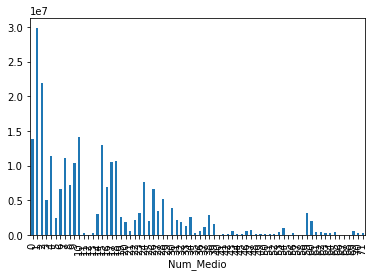

In [64]:
df.groupby('Num_Medio')['Importe'].sum().plot(kind='bar')

In [66]:
from pycaret.clustering import *

In [67]:
s = setup(df, normalize = True,silent=True)

,Description,Value
0,session_id,6025
1,Original Data,"(2563, 2)"
2,Missing Values,False
3,Numeric Features,2
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(2563, 2)"
9,CPU Jobs,-1


In [68]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6611,3826.1317,0.5477,0,0,0


In [69]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=6025, tol=0.0001, verbose=0)


In [70]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [71]:
result = assign_model(kmeans)

In [72]:
result

,Importe,Num_Medio,Cluster
0,512435.00,0,Cluster 3
1,480000.00,1,Cluster 3
2,406560.00,2,Cluster 3
3,310495.68,3,Cluster 3
4,258456.00,1,Cluster 0
...,...,...,...
2558,202211.33,28,Cluster 1
2559,169884.00,24,Cluster 1
2560,162624.00,18,Cluster 0
2561,151250.00,17,Cluster 0


In [85]:
clust_0 = result[result['Cluster'] == 'Cluster 0']['Importe'].sum()
clust_1 = result[result['Cluster'] == 'Cluster 1']['Importe'].sum()
clust_2 = result[result['Cluster'] == 'Cluster 2']['Importe'].sum()
clust_3 = result[result['Cluster'] == 'Cluster 3']['Importe'].sum()

In [86]:
gasto_total = clust_0 + clust_1 + clust_2 + clust_3
gasto_total

247034484.05

In [87]:
clust_0_porc = (clust_0 / gasto_total) * 100
clust_1_porc = (clust_1 / gasto_total) * 100
clust_2_porc = (clust_2 / gasto_total) * 100
clust_3_porc = (clust_3 / gasto_total) * 100

In [88]:
print(clust_0_porc, clust_1_porc, clust_2_porc, clust_3_porc)

22.605027854612185 18.83766782154234 20.18394557008811 38.37335875375736


In [91]:
len(result[result['Cluster'] == 'Cluster 3']['Num_Medio'].unique())

23

In [110]:
values_cluster_3 = result[result['Cluster'] == 'Cluster 3']['Num_Medio'].unique()
values_cluster_0 = result[result['Cluster'] == 'Cluster 0']['Num_Medio'].unique()
values_cluster_1 = result[result['Cluster'] == 'Cluster 1']['Num_Medio'].unique()
values_cluster_2 = result[result['Cluster'] == 'Cluster 2']['Num_Medio'].unique()

In [106]:
inv_mapping = {v: k for k, v in mapping.items()}

In [109]:
[inv_mapping[i] for i in values_cluster_3]

['FM 95.1 METRO',
 'AM 790 RADIO MITRE',
 'FM 99.9 LA 100',
 'AM 990 LA 990',
 'FM 98.3 MEGA',
 'FM 101.5 POP',
 'FM 89.9 RADIO CON VOS',
 'AM 950 CNN',
 'AM 910 LA RED',
 'FM 102.3 ASPEN',
 'AM 710 RADIO DIEZ',
 'FM 103.1 RADIO ONE',
 'FM 97.5 VALE',
 'FM 95.9 ROCK AND POP',
 'FM 92.1 VORTERIX',
 'FM 105.5 LOS 40 PRINCIPALES',
 'AM 630 RIVADAVIA',
 'AM 750',
 'AM 550 RADIO COLONIA',
 'FM 94.3 RADIO DISNEY',
 'AM 590 CONTINENTAL',
 'FM 100.7 BLUE',
 'FM 101.1 LATINA']

In [114]:
[inv_mapping[i] for i in values_cluster_2]

['FM 99.9 LA 100',
 'AM 790 RADIO MITRE',
 'FM 101.5 POP',
 'AM 710 RADIO DIEZ',
 'FM 94.3 RADIO DISNEY',
 'FM 95.1 METRO',
 'AM 910 LA RED',
 'CADENA 3',
 'GRUPO LITORAL']

<AxesSubplot:xlabel='Cluster', ylabel='Importe'>

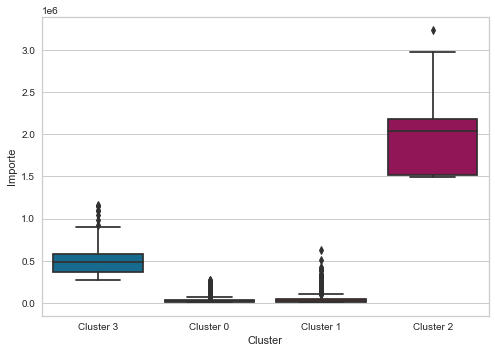

In [113]:
# Generete a box plot for each 'Cluster 0','Cluster 1', 'Cluster 2' and 'Cluster 3'
sns.boxplot(x='Cluster', y='Importe', data=result)

<AxesSubplot:xlabel='Num_Medio'>

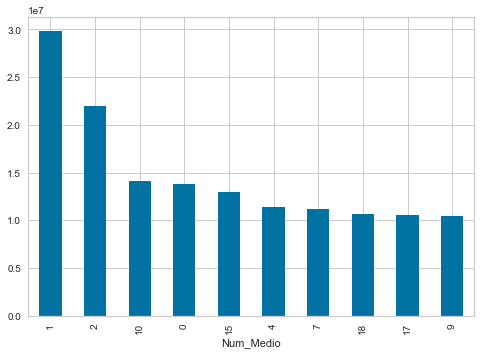

In [130]:
result.groupby('Num_Medio')['Importe'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

In [125]:
result.groupby('Num_Medio')['Importe'].sum().sort_values(ascending=False).head(10).apply(lambda x: x / gasto_total * 100)

Num_Medio
1     12.088472
2      8.895050
10     5.715900
0      5.586237
15     5.254869
4      4.592149
7      4.514501
18     4.332230
17     4.253466
9      4.211570
Name: Importe, dtype: float64

In [129]:
#Use inverse mapping to get the names of the 10 medios with the highest Importe and plot a histogram
[inv_mapping[i] for i in result.groupby('Num_Medio')['Importe'].sum().sort_values(ascending=False).head(10).index]


['AM 790 RADIO MITRE',
 'FM 99.9 LA 100',
 'AM 710 RADIO DIEZ',
 'FM 95.1 METRO',
 'FM 101.5 POP',
 'FM 95.9 ROCK AND POP',
 'FM 94.3 RADIO DISNEY',
 'AM 910 LA RED',
 'AM 950 CNN',
 'AM 630 RIVADAVIA']

In [131]:
# use inverse mapping to add a column with the names of the medios
result['Medio'] = result['Num_Medio'].apply(lambda x: inv_mapping[x])

In [137]:
result['Importe_m'] = result['Importe']/(1e6)

<AxesSubplot:xlabel='Medio', ylabel='Importe (millones de pesos)'>

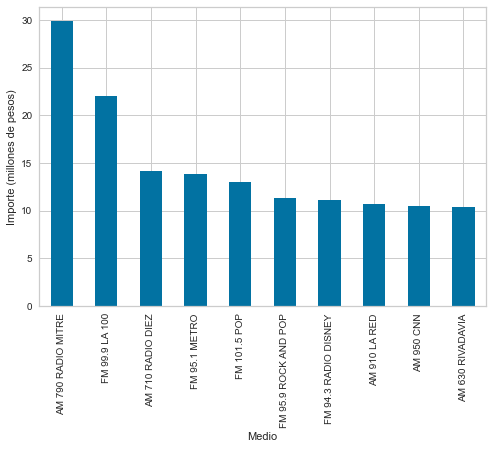

In [141]:
from cProfile import label


result.groupby('Medio')['Importe_m'].sum().sort_values(ascending=False).head(10).plot(kind='bar',ylabel='Importe (millones de pesos)')